 Arjun Sharma

In [5]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [105]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
df=pd.read_csv('C:\\EPGP\\Deep_learning\\santander-customer-transaction-prediction\\train.csv',encoding='latin-1')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [106]:
df['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

#The target variable is imbalanced. 
Separating the target variable and predictors

In [107]:
x=df.iloc[:,2:]
x.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [108]:
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_labels, val_labels = train_test_split(x,y,test_size=0.3,random_state=1)

In [114]:
train_labels.head()

175567    0
150751    0
95422     0
79966     1
145006    0
Name: target, dtype: int64

# Building a basic model with 3 layers

In [115]:
from keras import models
from keras import layers
from keras import optimizers

original_model = models.Sequential()
original_model.add(layers.Dense(32, activation='relu', input_dim=200))
original_model.add(layers.Dense(32, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [116]:
original_hist = original_model.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=512,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 4s 30us/step - loss: 0.3664 - acc: 0.8909 - val_loss: 0.2880 - val_acc: 0.9013
Epoch 2/100
140000/140000 [==============================] - 2s 18us/step - loss: 0.2853 - acc: 0.9009 - val_loss: 0.2911 - val_acc: 0.8978
Epoch 3/100
140000/140000 [==============================] - 2s 17us/step - loss: 0.2739 - acc: 0.9031 - val_loss: 0.2895 - val_acc: 0.9031
Epoch 4/100
140000/140000 [==============================] - 3s 18us/step - loss: 0.2676 - acc: 0.9041 - val_loss: 0.2580 - val_acc: 0.9072
Epoch 5/100
140000/140000 [==============================] - 2s 18us/step - loss: 0.2643 - acc: 0.9058 - val_loss: 0.2813 - val_acc: 0.8975
Epoch 6/100
140000/140000 [==============================] - 2s 18us/step - loss: 0.2618 - acc: 0.9059 - val_loss: 0.2545 - val_acc: 0.9082
Epoch 7/100
140000/140000 [==============================] - 2s 18us/step - loss: 0.2594 - acc: 0.9062 - val_

Epoch 59/100
140000/140000 [==============================] - 3s 18us/step - loss: 0.2353 - acc: 0.9132 - val_loss: 0.2716 - val_acc: 0.9091
Epoch 60/100
140000/140000 [==============================] - 3s 18us/step - loss: 0.2355 - acc: 0.9136 - val_loss: 0.2884 - val_acc: 0.9014
Epoch 61/100
140000/140000 [==============================] - 3s 18us/step - loss: 0.2348 - acc: 0.9134 - val_loss: 0.2781 - val_acc: 0.9043
Epoch 62/100
140000/140000 [==============================] - 3s 18us/step - loss: 0.2338 - acc: 0.9137 - val_loss: 0.2969 - val_acc: 0.9070
Epoch 63/100
140000/140000 [==============================] - 2s 17us/step - loss: 0.2346 - acc: 0.9134 - val_loss: 0.2703 - val_acc: 0.9099
Epoch 64/100
140000/140000 [==============================] - 3s 18us/step - loss: 0.2340 - acc: 0.9131 - val_loss: 0.2904 - val_acc: 0.8998
Epoch 65/100
140000/140000 [==============================] - 2s 18us/step - loss: 0.2341 - acc: 0.9134 - val_loss: 0.2720 - val_acc: 0.9098
Epoch 66/100


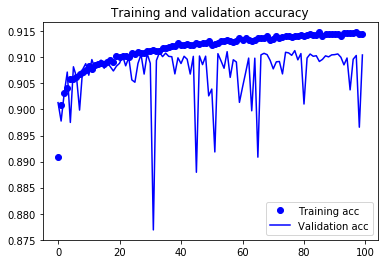

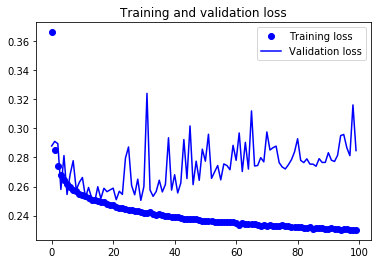

In [117]:
acc = original_hist.history['acc']
val_acc = original_hist.history['val_acc']
loss = original_hist.history['loss']
val_loss = original_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [118]:
y_pred=original_model.predict(val_data)
y_pred=y_pred>0.5
print(confusion_matrix(val_labels,y_pred))
print(classification_report(val_labels,y_pred))

[[53074   977]
 [ 4395  1554]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54051
           1       0.61      0.26      0.37      5949

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.77      0.62      0.66     60000
weighted avg       0.89      0.91      0.89     60000



### There is overfitting issue and the confusion matrix shows poor recall of 0.26 for minority class. Building 2nd model with drop out to see if it improves

In [119]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_dim=200))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [120]:
model2_hist = model2.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 5s 34us/step - loss: 0.6868 - acc: 0.8668 - val_loss: 0.3798 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3861 - acc: 0.8968 - val_loss: 0.3266 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3370 - acc: 0.8989 - val_loss: 0.3113 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3311 - acc: 0.8989 - val_loss: 0.3110 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3224 - acc: 0.8989 - val_loss: 0.2941 - val_acc: 0.9009
Epoch 6/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3150 - acc: 0.8989 - val_loss: 0.2983 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3107 - acc: 0.8989 - val_

Epoch 59/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.2673 - acc: 0.8989 - val_loss: 0.2762 - val_acc: 0.9009
Epoch 60/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.2669 - acc: 0.8989 - val_loss: 0.2768 - val_acc: 0.9009
Epoch 61/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.2669 - acc: 0.8989 - val_loss: 0.2814 - val_acc: 0.9009
Epoch 62/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.2672 - acc: 0.8989 - val_loss: 0.2740 - val_acc: 0.9009
Epoch 63/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.2666 - acc: 0.8989 - val_loss: 0.2845 - val_acc: 0.9009
Epoch 64/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.2669 - acc: 0.8989 - val_loss: 0.2734 - val_acc: 0.9009
Epoch 65/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.2660 - acc: 0.8989 - val_loss: 0.2742 - val_acc: 0.9009
Epoch 66/100


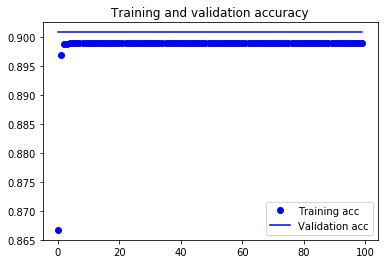

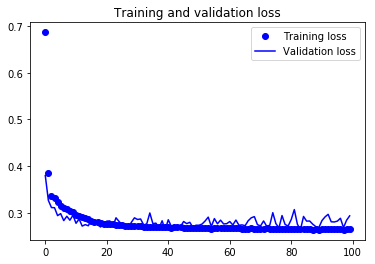

In [121]:
acc = model2_hist.history['acc']
val_acc = model2_hist.history['val_acc']
loss = model2_hist.history['loss']
val_loss = model2_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [122]:
y_pred2=model2.predict(val_data)
y_pred2=y_pred2>0.5
print(confusion_matrix(val_labels,y_pred2))
print(classification_report(val_labels,y_pred2))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The 2nd model shows better results in terms of overfitting. However the confusion matrix shows zero recall for minority class which is not good. Building 3rd model with 4 layers and nodes in descending order for every next layer.

In [123]:
model3 = models.Sequential()
model3.add(layers.Dense(32, activation='relu', input_dim=200))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [124]:
model3_hist = model3.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 5s 37us/step - loss: 0.6080 - acc: 0.8620 - val_loss: 0.3909 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.4196 - acc: 0.8980 - val_loss: 0.3365 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3654 - acc: 0.8989 - val_loss: 0.3185 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3498 - acc: 0.8989 - val_loss: 0.3058 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3398 - acc: 0.8989 - val_loss: 0.2991 - val_acc: 0.9009s: 0.3402 - acc:
Epoch 6/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3294 - acc: 0.8989 - val_loss: 0.2950 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3223 - ac

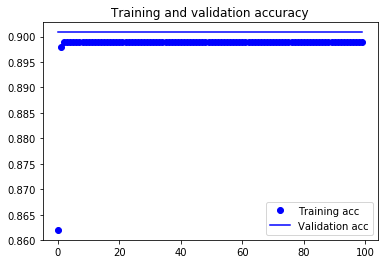

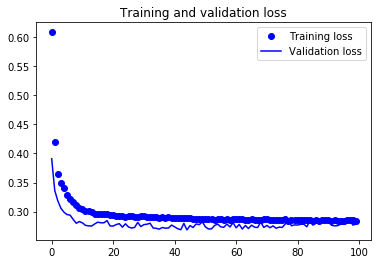

In [125]:
acc = model3_hist.history['acc']
val_acc = model3_hist.history['val_acc']
loss = model3_hist.history['loss']
val_loss = model3_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [126]:
y_pred3=model3.predict(val_data)
y_pred3=y_pred3>0.5
print(confusion_matrix(val_labels,y_pred3))
print(classification_report(val_labels,y_pred3))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The 3rd model also shows zero recall for minority class which is not good. Building 4th model with changing activation function to 'tanh'

In [127]:
model4 = models.Sequential()
model4.add(layers.Dense(32, activation='tanh', input_dim=200))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='tanh'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(8, activation='tanh'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [128]:
model4_hist = model4.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 6s 41us/step - loss: 0.4152 - acc: 0.8595 - val_loss: 0.3294 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3683 - acc: 0.8979 - val_loss: 0.3248 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.3545 - acc: 0.8989 - val_loss: 0.3235 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3478 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3444 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 6/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3410 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.3381 - acc: 0.8989 - val_

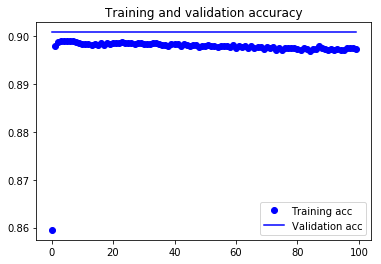

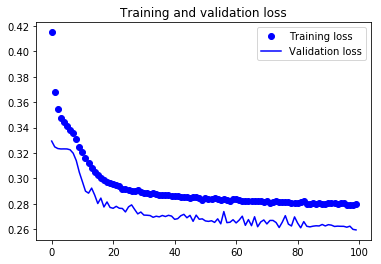

In [129]:
acc = model4_hist.history['acc']
val_acc = model4_hist.history['val_acc']
loss = model4_hist.history['loss']
val_loss = model4_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [131]:
y_pred4=model4.predict(val_data)
y_pred4=y_pred4>0.5
print(confusion_matrix(val_labels,y_pred4))
print(classification_report(val_labels,y_pred4))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The 4th model shows underfitting, changing activation function didn't help.Building 5th model by increasing dropout to 0.7 and activation back to RELU

In [132]:
model5 = models.Sequential()
model5.add(layers.Dense(32, activation='relu', input_dim=200))
model5.add(layers.Dropout(0.7))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dropout(0.7))
model5.add(layers.Dense(8, activation='relu'))
model5.add(layers.Dropout(0.7))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [134]:
model5_hist = model5.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.5704 - acc: 0.8988 - val_loss: 0.5140 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.5100 - acc: 0.8989 - val_loss: 0.4425 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.4721 - acc: 0.8989 - val_loss: 0.4087 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.4431 - acc: 0.8989 - val_loss: 0.3891 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.4207 - acc: 0.8989 - val_loss: 0.3769 - val_acc: 0.9009
Epoch 6/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3998 - acc: 0.8989 - val_loss: 0.3638 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 3s 19us/step - loss: 0.3843 - acc: 0.8989 - val_

Epoch 59/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.3274 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 60/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.3274 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 61/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.3274 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 62/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.3274 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 63/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.3274 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 64/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.3274 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 65/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.3274 - acc: 0.8989 - val_loss: 0.3232 - val_acc: 0.9009
Epoch 66/100


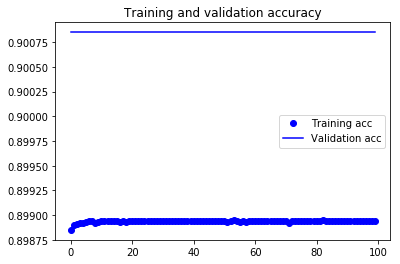

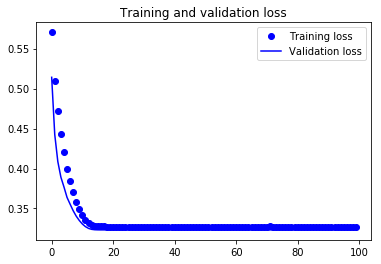

In [135]:
acc = model5_hist.history['acc']
val_acc = model5_hist.history['val_acc']
loss = model5_hist.history['loss']
val_loss = model5_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [144]:
y_pred5=model5.predict(val_data)
y_pred5=y_pred5>0.5
print(confusion_matrix(val_labels,y_pred5))
print(classification_report(val_labels,y_pred5))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The 5th model shows good fit. However the confusion matrix shows zero recall for minority class which is not good. Building 6th model with 3 layers only with 32,16 & 1 nodes respectively.

In [137]:
model6 = models.Sequential()
model6.add(layers.Dense(32, activation='relu', input_dim=200))
model6.add(layers.Dropout(0.7))
model6.add(layers.Dense(16, activation='relu'))
model6.add(layers.Dropout(0.7))
model6.add(layers.Dense(1, activation='sigmoid'))

model6.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [139]:
model6_hist = model6.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.4573 - acc: 0.8977 - val_loss: 0.3688 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.3781 - acc: 0.8988 - val_loss: 0.3270 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 2s 15us/step - loss: 0.3622 - acc: 0.8989 - val_loss: 0.3266 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.3577 - acc: 0.8989 - val_loss: 0.3251 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.3513 - acc: 0.8989 - val_loss: 0.3250 - val_acc: 0.9009
Epoch 6/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.3472 - acc: 0.8989 - val_loss: 0.3249 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.3431 - acc: 0.8989 - val_

Epoch 59/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2894 - acc: 0.8989 - val_loss: 0.2648 - val_acc: 0.9009
Epoch 60/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2884 - acc: 0.8989 - val_loss: 0.2662 - val_acc: 0.9009
Epoch 61/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2887 - acc: 0.8989 - val_loss: 0.2688 - val_acc: 0.9009
Epoch 62/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2880 - acc: 0.8989 - val_loss: 0.2687 - val_acc: 0.9009
Epoch 63/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2880 - acc: 0.8989 - val_loss: 0.2685 - val_acc: 0.9009
Epoch 64/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2879 - acc: 0.8989 - val_loss: 0.2652 - val_acc: 0.9009
Epoch 65/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2889 - acc: 0.8989 - val_loss: 0.2640 - val_acc: 0.9009
Epoch 66/100


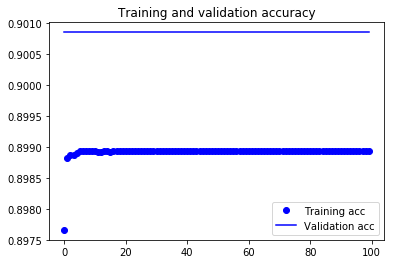

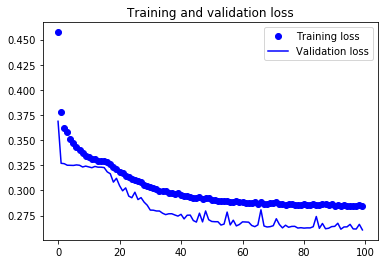

In [140]:
acc = model6_hist.history['acc']
val_acc = model6_hist.history['val_acc']
loss = model6_hist.history['loss']
val_loss = model6_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [143]:
y_pred6=model6.predict(val_data)
y_pred6=y_pred6>0.5
print(confusion_matrix(val_labels,y_pred6))
print(classification_report(val_labels,y_pred6))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The 6th model is a case of underfitting and the confusion matrix shows zero recall for minority class which is not good. Building 7th model with 3 layers only and without dropout

In [141]:
model7 = models.Sequential()
model7.add(layers.Dense(32, activation='relu', input_dim=200))
model7.add(layers.Dense(16, activation='relu'))
model7.add(layers.Dense(1, activation='sigmoid'))

model7.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [149]:
model7_hist = model7.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2227 - acc: 0.9184 - val_loss: 0.2894 - val_acc: 0.9081
Epoch 2/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2230 - acc: 0.9181 - val_loss: 0.2840 - val_acc: 0.9015
Epoch 3/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2229 - acc: 0.9182 - val_loss: 0.2840 - val_acc: 0.9055
Epoch 4/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2221 - acc: 0.9182 - val_loss: 0.2720 - val_acc: 0.9076
Epoch 5/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2228 - acc: 0.9179 - val_loss: 0.2838 - val_acc: 0.9067
Epoch 6/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2216 - acc: 0.9183 - val_loss: 0.2905 - val_acc: 0.9063
Epoch 7/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2225 - acc: 0.9183 - val_

Epoch 59/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2166 - acc: 0.9205 - val_loss: 0.2947 - val_acc: 0.9059
Epoch 60/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2161 - acc: 0.9205 - val_loss: 0.2892 - val_acc: 0.9057
Epoch 61/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2161 - acc: 0.9206 - val_loss: 0.2918 - val_acc: 0.9058
Epoch 62/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2167 - acc: 0.9205 - val_loss: 0.2875 - val_acc: 0.9060
Epoch 63/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2159 - acc: 0.9203 - val_loss: 0.2893 - val_acc: 0.9051
Epoch 64/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2159 - acc: 0.9209 - val_loss: 0.3129 - val_acc: 0.8981
Epoch 65/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2161 - acc: 0.9205 - val_loss: 0.2962 - val_acc: 0.9044
Epoch 66/100


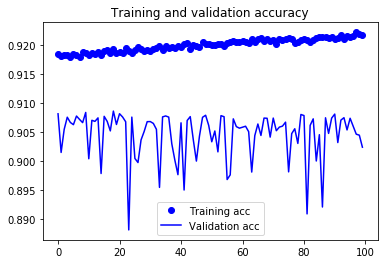

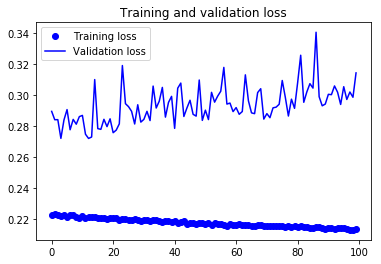

In [150]:
acc = model7_hist.history['acc']
val_acc = model7_hist.history['val_acc']
loss = model7_hist.history['loss']
val_loss = model7_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [151]:
y_pred7=model7.predict(val_data)
y_pred7=y_pred7>0.5
print(confusion_matrix(val_labels,y_pred7))
print(classification_report(val_labels,y_pred7))

[[52438  1613]
 [ 4243  1706]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     54051
           1       0.51      0.29      0.37      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.72      0.63      0.66     60000
weighted avg       0.88      0.90      0.89     60000



### The 7th model shows underfitting. However the confusion matrix shows better precision and recall for minority class compared to other models. F1 score is same as 0.37 like our original model.Building model8 by tweaking number of nodes from 16 to 8 in the above model to see if it helps

In [152]:
model8 = models.Sequential()
model8.add(layers.Dense(32, activation='relu', input_dim=200))
model8.add(layers.Dense(8, activation='relu'))
model8.add(layers.Dense(1, activation='sigmoid'))

model8.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [153]:
model8_hist = model8.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.3600 - acc: 0.8946 - val_loss: 0.2996 - val_acc: 0.9006
Epoch 2/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2911 - acc: 0.9002 - val_loss: 0.2867 - val_acc: 0.9030
Epoch 3/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2768 - acc: 0.9024 - val_loss: 0.2624 - val_acc: 0.9053
Epoch 4/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2706 - acc: 0.9040 - val_loss: 0.2854 - val_acc: 0.9027
Epoch 5/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2669 - acc: 0.9053 - val_loss: 0.2611 - val_acc: 0.9072
Epoch 6/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2648 - acc: 0.9058 - val_loss: 0.2596 - val_acc: 0.9079
Epoch 7/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2622 - acc: 0.9058 - val_

Epoch 59/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2345 - acc: 0.9130 - val_loss: 0.2656 - val_acc: 0.9100
Epoch 60/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2343 - acc: 0.9135 - val_loss: 0.2655 - val_acc: 0.9104
Epoch 61/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2341 - acc: 0.9134 - val_loss: 0.2761 - val_acc: 0.9104
Epoch 62/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2339 - acc: 0.9138 - val_loss: 0.2679 - val_acc: 0.9105
Epoch 63/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2343 - acc: 0.9138 - val_loss: 0.2619 - val_acc: 0.9098
Epoch 64/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2338 - acc: 0.9137 - val_loss: 0.2860 - val_acc: 0.8968
Epoch 65/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2338 - acc: 0.9133 - val_loss: 0.2643 - val_acc: 0.9100
Epoch 66/100


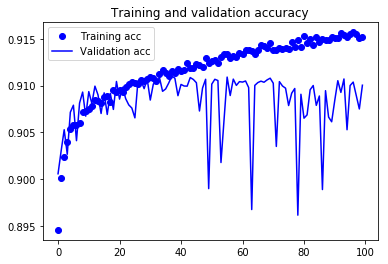

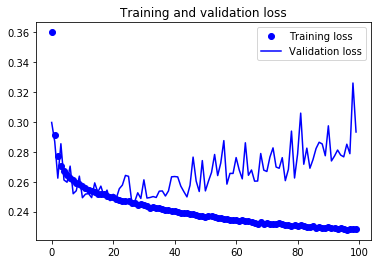

In [154]:
acc = model8_hist.history['acc']
val_acc = model8_hist.history['val_acc']
loss = model8_hist.history['loss']
val_loss = model8_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [155]:
y_pred8=model8.predict(val_data)
y_pred8=y_pred8>0.5
print(confusion_matrix(val_labels,y_pred8))
print(classification_report(val_labels,y_pred8))

[[53208   843]
 [ 4555  1394]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54051
           1       0.62      0.23      0.34      5949

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.77      0.61      0.65     60000
weighted avg       0.89      0.91      0.89     60000



### The 8th model shows overfitting. The F1 score for minority class is slightly lower than original model and model7. Building model9 with 5 layers with 128,64,32,16,1 nodes respectively and without dropouts

In [156]:
model9 = models.Sequential()
model9.add(layers.Dense(128, activation='relu', input_dim=200))
model9.add(layers.Dense(64, activation='relu'))
model9.add(layers.Dense(32, activation='relu'))
model9.add(layers.Dense(16, activation='relu'))
model9.add(layers.Dense(1, activation='sigmoid'))

model9.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [157]:
model9_hist = model9.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 6s 40us/step - loss: 0.3599 - acc: 0.8923 - val_loss: 0.3979 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2925 - acc: 0.9001 - val_loss: 0.2704 - val_acc: 0.9026
Epoch 3/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2798 - acc: 0.9023 - val_loss: 0.2620 - val_acc: 0.9062
Epoch 4/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2735 - acc: 0.9032 - val_loss: 0.3002 - val_acc: 0.9024
Epoch 5/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.2693 - acc: 0.9047 - val_loss: 0.2604 - val_acc: 0.9055
Epoch 6/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.2652 - acc: 0.9055 - val_loss: 0.3093 - val_acc: 0.9021
Epoch 7/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2616 - acc: 0.9067 - val_

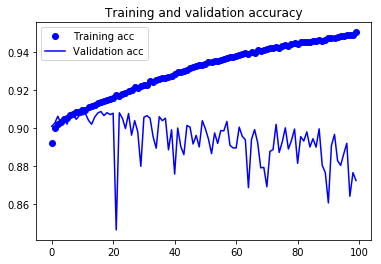

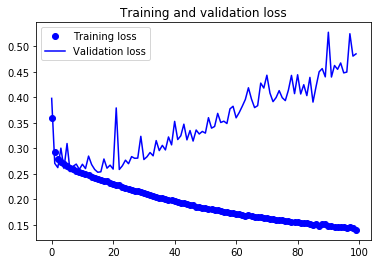

In [158]:
acc = model9_hist.history['acc']
val_acc = model9_hist.history['val_acc']
loss = model9_hist.history['loss']
val_loss = model9_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [159]:
y_pred9=model9.predict(val_data)
y_pred9=y_pred9>0.5
print(confusion_matrix(val_labels,y_pred9))
print(classification_report(val_labels,y_pred9))

[[50344  3707]
 [ 3942  2007]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     54051
           1       0.35      0.34      0.34      5949

   micro avg       0.87      0.87      0.87     60000
   macro avg       0.64      0.63      0.64     60000
weighted avg       0.87      0.87      0.87     60000



### The 9th model shows overfitting. The precision is alo lower for minority class compared to original model and model7. Adding dropout layers to see if it helps and build model10

In [160]:
model10 = models.Sequential()
model10.add(layers.Dense(128, activation='relu', input_dim=200))
model10.add(layers.Dropout(0.5))
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dropout(0.5))
model10.add(layers.Dense(32, activation='relu'))
model10.add(layers.Dropout(0.5))
model10.add(layers.Dense(16, activation='relu'))
model10.add(layers.Dropout(0.5))
model10.add(layers.Dense(1, activation='sigmoid'))

model10.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [161]:
model10_hist = model10.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 7s 51us/step - loss: 0.6189 - acc: 0.8620 - val_loss: 0.4269 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 4s 27us/step - loss: 0.3815 - acc: 0.8977 - val_loss: 0.3587 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 4s 29us/step - loss: 0.3480 - acc: 0.8988 - val_loss: 0.3266 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 4s 28us/step - loss: 0.3293 - acc: 0.8989 - val_loss: 0.3062 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 4s 27us/step - loss: 0.3179 - acc: 0.8989 - val_loss: 0.3038 - val_acc: 0.9009
Epoch 6/100
140000/140000 [==============================] - 4s 27us/step - loss: 0.3130 - acc: 0.8989 - val_loss: 0.3008 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 4s 27us/step - loss: 0.3064 - acc: 0.8989 - val_

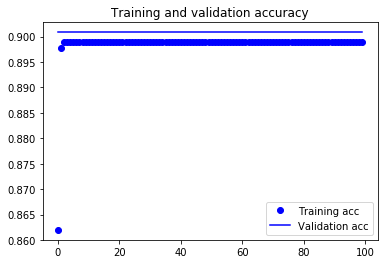

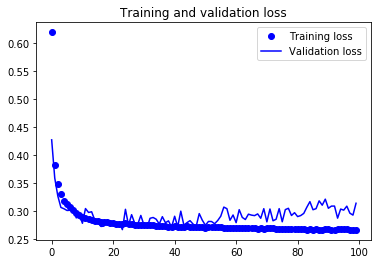

In [162]:
acc = model10_hist.history['acc']
val_acc = model10_hist.history['val_acc']
loss = model10_hist.history['loss']
val_loss = model10_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [163]:
y_pred10=model10.predict(val_data)
y_pred10=y_pred10>0.5
print(confusion_matrix(val_labels,y_pred10))
print(classification_report(val_labels,y_pred10))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The 10th model is better in terms of overfitting. The precision/recall/F1 score for minority class is however zero. Building model11 with 5 layers and 64,128,32,16,1 nodes respectively and withput dropout layers

In [164]:
model11 = models.Sequential()
model11.add(layers.Dense(64, activation='relu', input_dim=200))
model11.add(layers.Dense(128, activation='relu'))
model11.add(layers.Dense(32, activation='relu'))
model11.add(layers.Dense(16, activation='relu'))
model11.add(layers.Dense(1, activation='sigmoid'))

model11.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [165]:
model11_hist = model11.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 6s 41us/step - loss: 0.3560 - acc: 0.8921 - val_loss: 0.2851 - val_acc: 0.90123675 - acc
Epoch 2/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2913 - acc: 0.8998 - val_loss: 0.2924 - val_acc: 0.9012
Epoch 3/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2798 - acc: 0.9020 - val_loss: 0.2653 - val_acc: 0.9045
Epoch 4/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2739 - acc: 0.9024 - val_loss: 0.2620 - val_acc: 0.9044
Epoch 5/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2679 - acc: 0.9046 - val_loss: 0.2640 - val_acc: 0.9061
Epoch 6/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2656 - acc: 0.9050 - val_loss: 0.2768 - val_acc: 0.9012
Epoch 7/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.2627 - acc: 0.9

Epoch 59/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.1804 - acc: 0.9359 - val_loss: 0.3443 - val_acc: 0.8916
Epoch 60/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.1800 - acc: 0.9352 - val_loss: 0.3747 - val_acc: 0.8816
Epoch 61/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.1780 - acc: 0.9360 - val_loss: 0.3417 - val_acc: 0.8968
Epoch 62/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.1779 - acc: 0.9366 - val_loss: 0.3324 - val_acc: 0.9001
Epoch 63/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.1768 - acc: 0.9365 - val_loss: 0.3528 - val_acc: 0.9011
Epoch 64/100
140000/140000 [==============================] - 3s 21us/step - loss: 0.1771 - acc: 0.9370 - val_loss: 0.3332 - val_acc: 0.9036
Epoch 65/100
140000/140000 [==============================] - 3s 20us/step - loss: 0.1753 - acc: 0.9376 - val_loss: 0.3726 - val_acc: 0.8982
Epoch 66/100


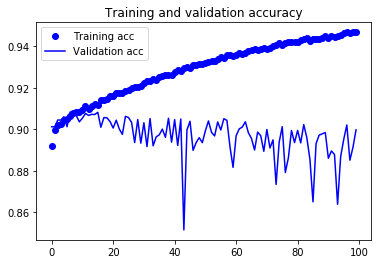

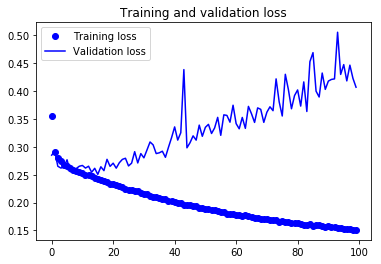

In [166]:
acc = model11_hist.history['acc']
val_acc = model11_hist.history['val_acc']
loss = model11_hist.history['loss']
val_loss = model11_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [167]:
y_pred11=model11.predict(val_data)
y_pred11=y_pred11>0.5
print(confusion_matrix(val_labels,y_pred11))
print(classification_report(val_labels,y_pred11))

[[52931  1120]
 [ 4899  1050]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54051
           1       0.48      0.18      0.26      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.70      0.58      0.60     60000
weighted avg       0.87      0.90      0.88     60000



### The 11th model has improved over model 10 in terms of precision/recall/F1 score for minority class, howevr lower than original model and model7. Adding dropout layers on model11 to see if it helps.

In [168]:
model12 = models.Sequential()
model12.add(layers.Dense(64, activation='relu', input_dim=200))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(128, activation='relu'))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(32, activation='relu'))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(16, activation='relu'))
model12.add(layers.Dropout(0.5))
model12.add(layers.Dense(1, activation='sigmoid'))

model12.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [169]:
model12_hist = model12.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 7s 50us/step - loss: 0.8829 - acc: 0.7908 - val_loss: 0.4719 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 4s 25us/step - loss: 0.4366 - acc: 0.8920 - val_loss: 0.3319 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 4s 26us/step - loss: 0.3905 - acc: 0.8989 - val_loss: 0.3316 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 4s 26us/step - loss: 0.3712 - acc: 0.8989 - val_loss: 0.3276 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 4s 25us/step - loss: 0.3554 - acc: 0.8989 - val_loss: 0.3132 - val_acc: 0.9009
Epoch 6/100
140000/140000 [==============================] - 3s 25us/step - loss: 0.3455 - acc: 0.8989 - val_loss: 0.3031 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 4s 25us/step - loss: 0.3350 - acc: 0.8989 - val_

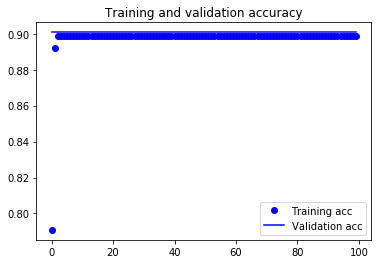

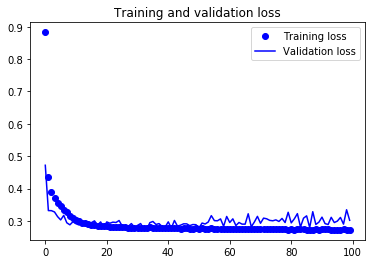

In [170]:
acc = model12_hist.history['acc']
val_acc = model12_hist.history['val_acc']
loss = model12_hist.history['loss']
val_loss = model12_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [176]:
y_pred12=model12.predict(val_data)
y_pred12=y_pred12>0.5
print(confusion_matrix(val_labels,y_pred12))
print(classification_report(val_labels,y_pred12))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The 12th model is better in terms of overfitting. The precision/recall/F1 score for minority class is however zero. Building model 13 with 3 layers and 16,64,1 nodes respectively (without dropout)

In [173]:
model13 = models.Sequential()
model13.add(layers.Dense(16, activation='relu', input_dim=200))
model13.add(layers.Dense(64, activation='relu'))
model13.add(layers.Dense(1, activation='sigmoid'))

model13.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [174]:
model13_hist = model13.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 4s 32us/step - loss: 0.3461 - acc: 0.8906 - val_loss: 0.3149 - val_acc: 0.9008
Epoch 2/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2953 - acc: 0.8987 - val_loss: 0.2871 - val_acc: 0.9016
Epoch 3/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2834 - acc: 0.9008 - val_loss: 0.2761 - val_acc: 0.9026
Epoch 4/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2746 - acc: 0.9026 - val_loss: 0.2635 - val_acc: 0.9044
Epoch 5/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2715 - acc: 0.9034 - val_loss: 0.2739 - val_acc: 0.9043
Epoch 6/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2676 - acc: 0.9043 - val_loss: 0.2646 - val_acc: 0.9041
Epoch 7/100
140000/140000 [==============================] - 1s 10us/step - loss: 0.2652 - acc: 0.9050 - val_

Epoch 59/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2386 - acc: 0.9131 - val_loss: 0.2490 - val_acc: 0.9095
Epoch 60/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2381 - acc: 0.9131 - val_loss: 0.2497 - val_acc: 0.9093
Epoch 61/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2386 - acc: 0.9130 - val_loss: 0.2495 - val_acc: 0.9087
Epoch 62/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2381 - acc: 0.9128 - val_loss: 0.2616 - val_acc: 0.9084
Epoch 63/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2382 - acc: 0.9131 - val_loss: 0.2589 - val_acc: 0.9052
Epoch 64/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2379 - acc: 0.9138 - val_loss: 0.2512 - val_acc: 0.9081
Epoch 65/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.2374 - acc: 0.9137 - val_loss: 0.2676 - val_acc: 0.9075
Epoch 66/100


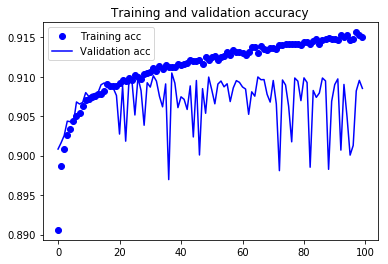

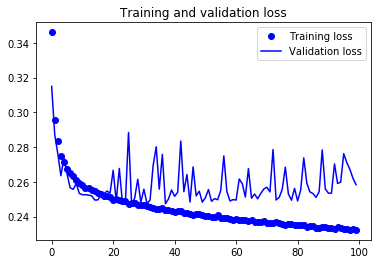

In [175]:
acc = model13_hist.history['acc']
val_acc = model13_hist.history['val_acc']
loss = model13_hist.history['loss']
val_loss = model13_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [177]:
y_pred13=model13.predict(val_data)
y_pred13=y_pred13>0.5
print(confusion_matrix(val_labels,y_pred13))
print(classification_report(val_labels,y_pred13))

[[53642   409]
 [ 5080   869]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     54051
           1       0.68      0.15      0.24      5949

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.80      0.57      0.60     60000
weighted avg       0.89      0.91      0.88     60000



### The 13th model has overfitting. The precision/recall/F1 score for minority class is however better than previous model.Adding dropout layers to the 13th model

In [178]:
model14 = models.Sequential()
model14.add(layers.Dense(16, activation='relu', input_dim=200))
model14.add(layers.Dropout(0.5))
model14.add(layers.Dense(64, activation='relu'))
model14.add(layers.Dropout(0.5))
model14.add(layers.Dense(1, activation='sigmoid'))

model14.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [179]:
model14_hist = model14.fit(train_data, train_labels,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(val_data, val_labels))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 3s 23us/step - loss: 0.5073 - acc: 0.8758 - val_loss: 0.3453 - val_acc: 0.9009
Epoch 2/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.3447 - acc: 0.8988 - val_loss: 0.3328 - val_acc: 0.9009
Epoch 3/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.3236 - acc: 0.8989 - val_loss: 0.3248 - val_acc: 0.9009
Epoch 4/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.3191 - acc: 0.8989 - val_loss: 0.3178 - val_acc: 0.9009
Epoch 5/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.3142 - acc: 0.8989 - val_loss: 0.3138 - val_acc: 0.9009
Epoch 6/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.3108 - acc: 0.8989 - val_loss: 0.3177 - val_acc: 0.9009
Epoch 7/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.3076 - acc: 0.8989 - val_

Epoch 59/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.2750 - acc: 0.8989 - val_loss: 0.3250 - val_acc: 0.9009
Epoch 60/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.2739 - acc: 0.8989 - val_loss: 0.3193 - val_acc: 0.9009
Epoch 61/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.2746 - acc: 0.8989 - val_loss: 0.3423 - val_acc: 0.9009
Epoch 62/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.2738 - acc: 0.8989 - val_loss: 0.3464 - val_acc: 0.9009
Epoch 63/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.2735 - acc: 0.8989 - val_loss: 0.3082 - val_acc: 0.9009
Epoch 64/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.2737 - acc: 0.8989 - val_loss: 0.3089 - val_acc: 0.9009
Epoch 65/100
140000/140000 [==============================] - 2s 14us/step - loss: 0.2724 - acc: 0.8989 - val_loss: 0.3322 - val_acc: 0.9009
Epoch 66/100


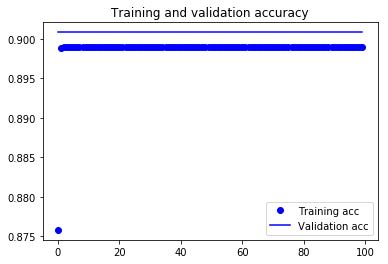

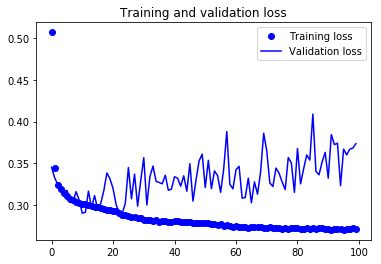

In [180]:
acc = model14_hist.history['acc']
val_acc = model14_hist.history['val_acc']
loss = model14_hist.history['loss']
val_loss = model14_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [181]:
y_pred14=model14.predict(val_data)
y_pred14=y_pred14>0.5
print(confusion_matrix(val_labels,y_pred14))
print(classification_report(val_labels,y_pred14))

[[54051     0]
 [ 5949     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54051
           1       0.00      0.00      0.00      5949

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



### The above model is not good in terms of overfitting and also minority class precision/recall.

## SUMMARY: We can say that due to high imbalance the minority class precision and recall is not too good. However our original first model with 3 layers with 32,32,1 nodes respectively and RELU activation function has the best accuracy (0.91) and Minority class precision/recall of 0.61/0.26 respectively. Further techniques of boosting minority class by using techniques liek SMOTE might help

In [ ]:
#############SMOTE##########################################3

# APPLYING SMOTE ON DATA-SET AND BALANCING IT

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/arjun_0ozfyct/Documents/DEEP_LEARNING_HACKATHON/train.csv',encoding='latin-1')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
x=df.iloc[:,2:]
y=df['target']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['target'])

C:\Users\arjun_0ozfyct\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['target']==0]))
print("Number of subscription",len(os_data_y[os_data_y['target']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['target']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['target']==1])/len(os_data_X))

length of oversampled data is  252032
Number of no subscription in oversampled data 126016
Number of subscription 126016
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [23]:
from keras import models
from keras import layers
from keras import optimizers
model14 = models.Sequential()
model14.add(layers.Dense(32, activation='relu', input_dim=200))
model14.add(layers.Dense(16, activation='relu'))
model14.add(layers.Dense(1, activation='sigmoid'))

model14.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [24]:
model14_hist = model14.fit(X_train, y_train,
                                   epochs=100,
                                   batch_size=1024,
                                   validation_data=(X_test, y_test))

Train on 140000 samples, validate on 60000 samples
Epoch 1/100
140000/140000 [==============================] - 2s 13us/step - loss: 0.4712 - acc: 0.8801 - val_loss: 0.3004 - val_acc: 0.8970
Epoch 2/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2845 - acc: 0.9021 - val_loss: 0.2809 - val_acc: 0.9016
Epoch 3/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2734 - acc: 0.9039 - val_loss: 0.2722 - val_acc: 0.9022
Epoch 4/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2674 - acc: 0.9047 - val_loss: 0.2737 - val_acc: 0.9028
Epoch 5/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2637 - acc: 0.9056 - val_loss: 0.2621 - val_acc: 0.9052
Epoch 6/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2613 - acc: 0.9067 - val_loss: 0.2637 - val_acc: 0.9056
Epoch 7/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2587 - acc: 0.9076 - val_

Epoch 59/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2293 - acc: 0.9162 - val_loss: 0.2676 - val_acc: 0.9069
Epoch 60/100
140000/140000 [==============================] - 1s 11us/step - loss: 0.2292 - acc: 0.9156 - val_loss: 0.2629 - val_acc: 0.9074
Epoch 61/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2291 - acc: 0.9159 - val_loss: 0.2605 - val_acc: 0.9065
Epoch 62/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2291 - acc: 0.9161 - val_loss: 0.2610 - val_acc: 0.9069
Epoch 63/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2282 - acc: 0.9160 - val_loss: 0.2612 - val_acc: 0.9068
Epoch 64/100
140000/140000 [==============================] - 2s 12us/step - loss: 0.2286 - acc: 0.9160 - val_loss: 0.2682 - val_acc: 0.9061
Epoch 65/100
140000/140000 [==============================] - 2s 11us/step - loss: 0.2277 - acc: 0.9158 - val_loss: 0.2756 - val_acc: 0.9045
Epoch 66/100


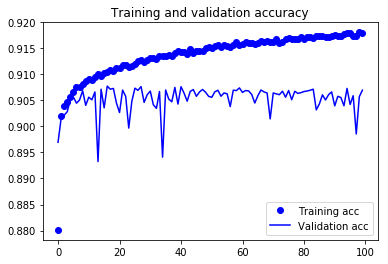

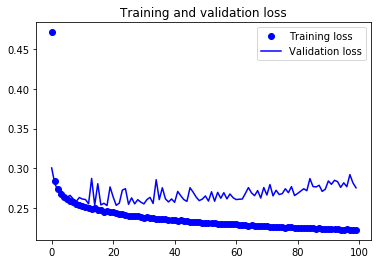

In [25]:
acc = model14_hist.history['acc']
val_acc = model14_hist.history['val_acc']
loss = model14_hist.history['loss']
val_loss = model14_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
y_pred14=model14.predict(X_test)
y_pred14=y_pred14>0.5
print(confusion_matrix(y_test,y_pred14))
print(classification_report(y_test,y_pred14))

[[53161   725]
 [ 4857  1257]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53886
           1       0.63      0.21      0.31      6114

    accuracy                           0.91     60000
   macro avg       0.78      0.60      0.63     60000
weighted avg       0.89      0.91      0.88     60000

